<a href="https://colab.research.google.com/github/freida20git/nanoparticle-classification/blob/main/triangles/triangles_yolo_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 types of detections

data1: cubes, pyramids,

data2: triangles, circle, truncated

data3: dots, other


the bounding box is the whole picture

In [ ]:
'''
data looks like: (each - is a sub directory)

triangles:

-triangles_full_images:
--train:
---triangles_train1.jpg
---triangles_train2.jpg
---triangles_train3.jpg
---triangles_train4.jpg
--validation:
---triangles_valid1.jpg
---triangles_valid2.jpg
--test:
---triangles_test.jpg

# clssified data bboxes:

-triangles_data:
--train:
---triangle:
---truncated:
----triangle_train3_360_201_418_239.jpg
---circle:
--validation:
---triangle:
---truncated:
----triangle_train#_x1_y1_x2_y2.jpg
---circle:
--test:
---triangle:
---truncated:
----triangle_train#_x1_y1_x2_y2.jpg
---circle:
'''

In [ ]:
# ORIGINAL FOLDER :
'''
!gdown --folder "https://drive.google.com/drive/folders/1wI0TxEccoLLZ2M7LSYJX88HF6klQiApZ?usp=sharing"
!gdown --folder "https://drive.google.com/drive/folders/1YpOsCSXkNe3gMmHK98FGKm187aIGlCFf?usp=sharing"

'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
!gdown --folder 1NrA-p4k9URB6GhS85Chtimb_48KQWr09

In [ ]:
import os
import shutil
import cv2
from PIL import Image
from IPython.display import Image as IPyImage
from matplotlib import pyplot as plt
from ultralytics import YOLO

In [ ]:
# Map class names to YOLO class IDs
CLASS_MAP = {
    "circle": 0,
    "triangle": 1,
    "truncated": 2
}

# Edit images:

In [ ]:
def copy_and_prefix_images_to_yolo_structure(src_base_dir, dst_base_dir):
    """
    Copies image files into YOLO-style structure:
    dst_base_dir/split/images/
    Adds class name as a prefix to each filename.
    """
    for split in ['train', 'validation', 'test']:
        dst_images_dir = os.path.join(dst_base_dir, split, 'images')
        os.makedirs(dst_images_dir, exist_ok=True)

        for cls in CLASS_MAP.keys():
            src_folder = os.path.join(src_base_dir, split, cls)
            if os.path.exists(src_folder):
                for filename in os.listdir(src_folder):
                    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                        # Add class prefix to filename
                        new_filename = f"{cls}_{filename}"
                        src_path = os.path.join(src_folder, filename)
                        dst_path = os.path.join(dst_images_dir, new_filename)
                        shutil.copy2(src_path, dst_path)

# Example usage
src_directory = '/content/drive/MyDrive/triangles_project/triangle_truncated_circle_small'
dst_directory = '/content/drive/MyDrive/triangles_project/yolo_data'

copy_and_prefix_images_to_yolo_structure(src_directory, dst_directory)
print("✅ All images copied with class prefix to YOLO-style structure.")


✅ All images copied with class prefix to YOLO-style structure.


In [ ]:
def find_image_sizes(base_dir):
    image_dict={}
    try:
      for i in os.listdir(base_dir):
          for j in os.listdir(os.path.join(base_dir,i)):
            print(j)
            image_path=os.path.join(base_dir,i,j)
            with Image.open(image_path) as img:
                width, height = img.size
              #  name=j[len(base_dir)+1:]
                name= os.path.splitext(j)[0]
                image_dict[name]=(width,height)
                print("Image:", j)
                print(f"Size: {width}x{height}")
      return image_dict
    except FileNotFoundError:
        print("Error: Image file not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
ORIGINAL_IMAGE_SIZES=find_image_sizes('/content/drive/MyDrive/triangles_project/triangles_full_images')

triangles_test.jpg
Image: triangles_test.jpg
Size: 1006x921
triangles_train1.jpg
Image: triangles_train1.jpg
Size: 485x412
triangles_train2.jpg
Image: triangles_train2.jpg
Size: 1389x628
triangles_train3.jpg
Image: triangles_train3.jpg
Size: 482x845
triangles_valid1.jpg
Image: triangles_valid1.jpg
Size: 1024x1024
triangles_valid2.png
Image: triangles_valid2.png
Size: 1536x1024
triangles_valid2_bboxes.png
Image: triangles_valid2_bboxes.png
Size: 1536x1024
triangles_valid1_bboxes.jpg
Image: triangles_valid1_bboxes.jpg
Size: 1024x1024
triangles_valid1_bboxes.png
Image: triangles_valid1_bboxes.png
Size: 1024x1024
valid1_all_bboxes.png
Image: valid1_all_bboxes.png
Size: 1024x1024
valid2_all_bboxes.png
Image: valid2_all_bboxes.png
Size: 1536x1024


In [ ]:
ORIGINAL_IMAGE_SIZES= {'triangles_test': (1006, 921), 'triangles_train1': (485, 412), 'triangles_train2': (1389, 628), 'triangles_train3': (482, 845), 'triangles_valid1': (1024, 1024), 'triangles_valid2': (1536, 1024), 'triangles_valid2_bboxes': (1536, 1024), 'triangles_valid1_bboxes': (1024, 1024), 'valid1_all_bboxes': (1024, 1024), 'valid2_all_bboxes': (1536, 1024)}

In [ ]:
print(ORIGINAL_IMAGE_SIZES)

{'triangles_test': (1006, 921), 'triangles_train1': (485, 412), 'triangles_train2': (1389, 628), 'triangles_train3': (482, 845), 'triangles_valid1': (1024, 1024), 'triangles_valid2': (1536, 1024), 'triangles_valid2_bboxes': (1536, 1024), 'triangles_valid1_bboxes': (1024, 1024), 'valid1_all_bboxes': (1024, 1024), 'valid2_all_bboxes': (1536, 1024)}


In [ ]:
def create_yolo_labels_single_file(image_dir, base_dir):
    # Prepare detections per split
    detections_per_split = {
        'train': {},
        'valid': {},
        'test': {}
    }

    for filename in os.listdir(image_dir):
        if not filename.endswith(('.jpg', '.png')):
            continue

        name_parts = filename.split('.')[0].split('_')
        # Check for the expected minimum number of parts
        if len(name_parts) < 7:
             print(f"Skipping invalid filename format: {filename}")
             continue


        cls_name = name_parts[0]
        # Split ID is usually the 3rd part (index 2)
        split_id_part = name_parts[2]
        split = ''.join(filter(str.isalpha, split_id_part)) # Extract the alphabetic part (train, valid, test)
        image_id = f"triangles_{split_id_part}" # Use the full split ID (e.g., train1) as the key

        class_id = CLASS_MAP.get(cls_name, -1)
        if class_id == -1:
            print(f"Unknown class '{cls_name}' in filename: {filename}")
            continue

        try:
            # Determine the starting index for bounding box coordinates
            # It seems there might be an extra part like 'face' in some filenames
            # We need to find where the numeric coordinates start
            bbox_start_index = -4 # Assuming the last 4 parts are bbox coordinates

           # filename = f"{original_img_forFileName}_{x1}_{y1}_{x2}_{y2}.jpg"
           # xy1 = left bottom point
           # xy2 = right top point

            # Extract and convert bounding box coordinates
            x1 = int(name_parts[bbox_start_index])
            y1 = int(name_parts[bbox_start_index + 1])
            x2 = int(name_parts[bbox_start_index + 2])
            y2 = int(name_parts[bbox_start_index + 3])

            # Ensure bounding box coordinates are valid
            if x1 >= x2 or y1 >= y2:
                 print(f"Invalid bounding box dimensions (x1 >= x2 or y2 >= y1) for image '{image_id}': {filename}")
                 continue

            if image_id not in ORIGINAL_IMAGE_SIZES:
                print(f"Unknown image key '{image_id}' in filename: {filename}")
                continue


        except (ValueError, IndexError) as e :
            print(f"Invalid bbox values or filename format in {filename}: {e}")
            continue
        except KeyError as e:
             print(f"Missing image size data for key {e} in filename: {filename}")
             continue

        # Convert (x1, y1, x2, y2) to YOLO (x_center, y_center, w, h)
        w = x2 - x1
        h = y2 - y1

        x_center = x1 + (w / 2)
        y_center = y1 + (h / 2)
        img_w, img_h = ORIGINAL_IMAGE_SIZES[image_id]

        # Normalize the values
        # Add checks to prevent division by zero if img_w or img_h are 0
        if img_w == 0 or img_h == 0:
            print(f"Skipping image with zero dimension: {filename}")
            continue
        if x_center < img_w and y_center < img_h:
            x_center_norm = x_center / img_w
            y_center_norm = y_center / img_h
            w_norm = w / img_w
            h_norm = h / img_h

            # Add detection to the correct split
            if image_id not in detections_per_split[split]:
                detections_per_split[split][image_id] = []

            detections_per_split[split][image_id].append(
                f"{class_id} {x_center_norm:.6f} {y_center_norm:.6f} {w_norm:.6f} {h_norm:.6f}"
            )
        else: print(f"Invalid bounding box dimensions for image '{image_id}': {filename}")

    # Write YOLO label files per split
    for split, detections_dict in detections_per_split.items():
        # Ensure the split directory exists within the base_dir
        split_dir = os.path.join(base_dir, split)
        os.makedirs(split_dir, exist_ok=True)

        for image_id, detections in detections_dict.items():
            # The label path should be within the split directory
            label_path = os.path.join(split_dir, f"{image_id}.txt")
            with open(label_path, 'w') as f:
                f.write('\n'.join(detections) + '\n')


In [ ]:
# Define your base directory where labels should be saved
base_label_dir = '/content/drive/MyDrive/triangles_project/triangles_full_images'

# Call for train images
create_yolo_labels_single_file('/content/drive/MyDrive/triangles_project/yolo_data/train/images', base_label_dir)

# Call for validation images
create_yolo_labels_single_file('/content/drive/MyDrive/triangles_project/yolo_data/val/images', base_label_dir)

# Call for test images
create_yolo_labels_single_file('/content/drive/MyDrive/triangles_project/yolo_data/test/images', base_label_dir)


continue preparing data:

In [ ]:
def create_directories(base_dir):
    for split in ['train', 'valid', 'test']:
        split_dir = os.path.join(base_dir, split)
        # Create the new 'images' and 'labels' directories within the split folder
        image_dir = os.path.join(split_dir, 'images')
        label_dir = os.path.join(split_dir, 'labels')
        os.makedirs(image_dir, exist_ok=True)
        os.makedirs(label_dir, exist_ok=True)
        files_in_split = os.listdir(split_dir)
        for file in files_in_split:
            if file.endswith('.txt'):
                shutil.move(os.path.join(split_dir, file), label_dir)
            if file.endswith(('.jpg', '.png')):
                shutil.move(os.path.join(split_dir, file), image_dir)



In [ ]:
create_directories("/content/drive/MyDrive/triangles_project/triangles_full_images")

## FIXING AND DOUBLE CHECKING VALID BBOX ERRORS:

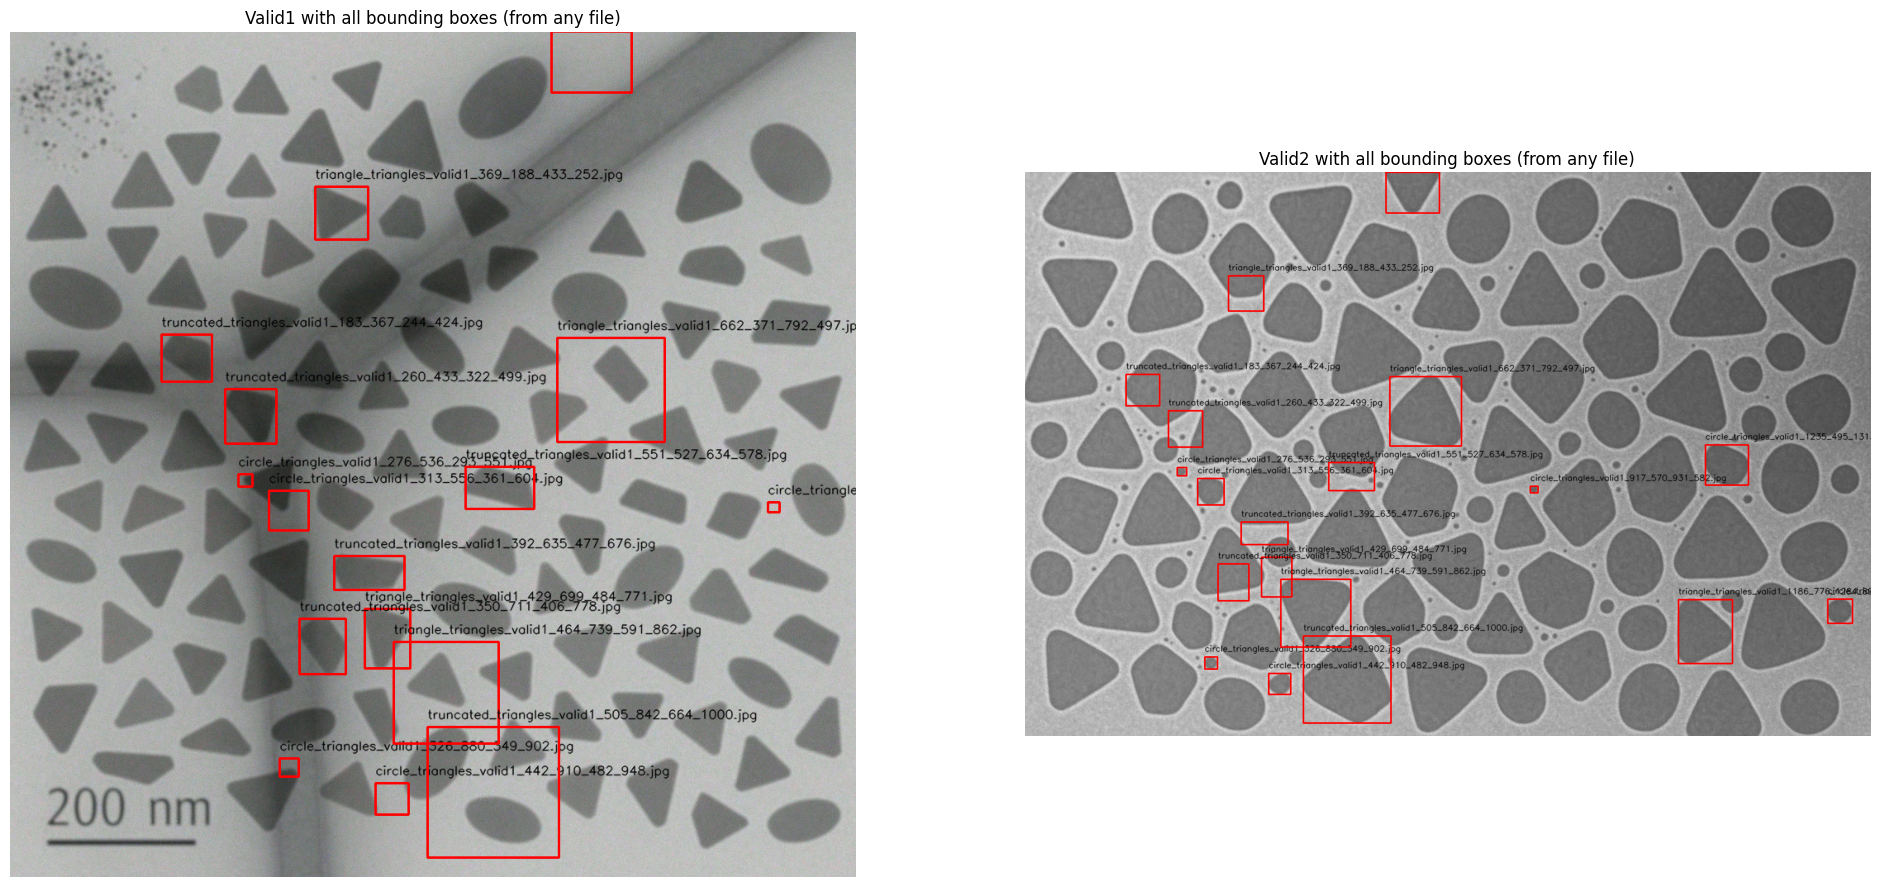

In [ ]:
import cv2
import os
from matplotlib import pyplot as plt

# Paths
bbox_folder = '/content/drive/MyDrive/triangles_project/yolo_data/validation/images'
valid_images_folder = '/content/drive/MyDrive/triangles_project/triangles_full_images/valid'

valid_images = {
    'valid1': 'triangles_valid1.jpg',
    'valid2': 'triangles_valid2.png'
}

def draw_all_bboxes(img, bbox_files):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for filename in bbox_files:
        name_parts = filename.split('.')[0].split('_')
        try:
            x1, y1, x2, y2 = map(int, name_parts[-4:])
            # Draw the rectangle
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
            # Draw filename above bbox
            cv2.putText(img_rgb, filename, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, (0, 0, 0), 1, cv2.LINE_AA)
        except Exception as e:
            print(f"❌ Error parsing bbox for {filename}: {e}")
    return img_rgb

# Load bbox filenames once
all_bbox_files = os.listdir(bbox_folder)

# Load both images
img1 = cv2.imread(os.path.join(valid_images_folder, valid_images['valid1']))
img2 = cv2.imread(os.path.join(valid_images_folder, valid_images['valid2']))

if img1 is None or img2 is None:
    raise FileNotFoundError("One or both images not found.")

# Draw all bboxes on both images
img1_with_bboxes = draw_all_bboxes(img1, all_bbox_files)
img2_with_bboxes = draw_all_bboxes(img2, all_bbox_files)

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(24, 12))
axs[0].imshow(img1_with_bboxes)
axs[0].axis('off')
axs[0].set_title('Valid1 with all bounding boxes (from any file)')

axs[1].imshow(img2_with_bboxes)
axs[1].axis('off')
axs[1].set_title('Valid2 with all bounding boxes (from any file)')

plt.show()


In [ ]:
''' valid1 bboxes that are really VALID2!!:
circle_triangles_valid1_326_880_349_902.jpg
circle_triangle_valid1_442_910_482_948.jpg
circle_triangles_valid1_917_570_931_582.jpg
circle_triangles_valid1_1235_495_1313_568.jpg
circle_triangles_valid1_1457_775_1502_819.jpg
circle_triangles_valid1_313_556_361_604.jpg
cricle_triangles_valid1_276_536_293_551.jpg
truncated_triangles_valid1_505_842_664_1000.jpg
triangle_triangles_valid1_464_739_591_862.jpg
triangle_triangles_valid1_655_0_752_74.jpg
triangle_triangles_valid1_662_371_792_497.jpg
triangle_triangles_valid1_1186_776_1284_892.jpg
'''

In [ ]:
# Define explicit bbox filenames for valid2
filenames_for_valid2 = {
    "triangle_triangles_valid1_655_0_752_74.jpg",
    "circle_triangles_valid1_326_880_349_902.jpg",
    "circle_triangle_valid1_442_910_482_948.jpg",
    "truncated_triangles_valid1_505_842_664_1000.jpg",
    "triangle_triangles_valid1_464_739_591_862.jpg",
    "circle_triangles_valid1_313_556_361_604.jpg",
    "cricle_triangles_valid1_276_536_293_551.jpg",
    "triangle_triangles_valid1_662_371_792_497.jpg",
    "circle_triangles_valid1_917_570_931_582.jpg",
    "circle_triangles_valid1_1235_495_1313_568.jpg",
    "circle_triangles_valid1_1457_775_1502_819.jpg",
    "triangle_triangles_valid1_1186_776_1284_892.jpg"
}

# Get all bbox files from the folder
import os

bbox_folder = '/content/drive/MyDrive/triangles_project/yolo_data/validation/images'
all_bbox_files = set(os.listdir(bbox_folder))

# All others are assumed to belong to valid1
filenames_for_valid1 = all_bbox_files - filenames_for_valid2

# Check for overlap just in case
overlap = filenames_for_valid1.intersection(filenames_for_valid2)
if overlap:
    print("⚠️ The following bbox filenames appear in both valid1 and valid2:")
    for fname in overlap:
        print("-", fname)
else:
    print("✅ No overlap between valid1 and valid2 bbox filenames.")


✅ No overlap between valid1 and valid2 bbox filenames.


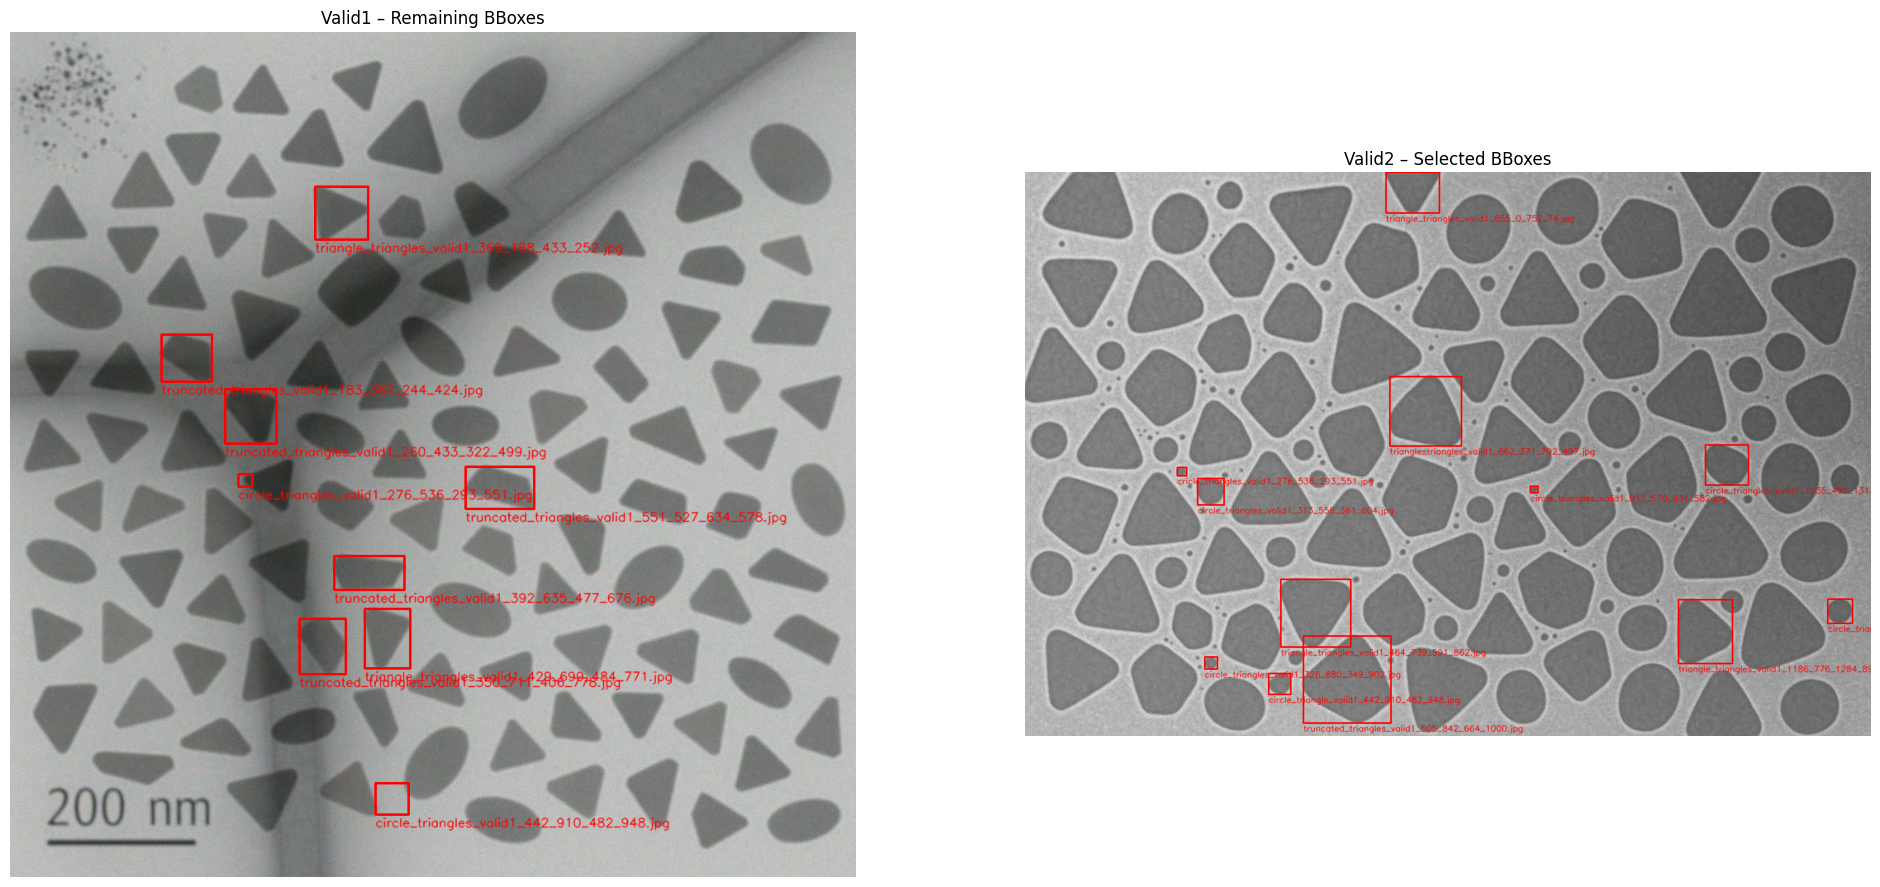

In [ ]:
# fixed bboxes:

# Get all bbox filenames in the directory
all_bbox_files = os.listdir(bbox_folder)

# Group: valid2 specified above, the rest go to valid1
filenames_for_valid1 = [f for f in all_bbox_files if f not in filenames_for_valid2]

def draw_specific_bboxes(image_path, filenames):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not load image: {image_path}")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for filename in filenames:
        name_parts = filename.split('.')[0].split('_')
        try:
            x1, y1, x2, y2 = map(int, name_parts[-4:])
            # Draw box
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
            # Draw filename below the box
            cv2.putText(img_rgb, filename, (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (255, 0, 0), 1, cv2.LINE_AA)
        except Exception as e:
            print(f"Error parsing bbox for {filename}: {e}")
    return img_rgb

# Draw bboxes for valid1 and valid2
img1_with_bboxes = draw_specific_bboxes(
    os.path.join(valid_images_folder, 'triangles_valid1.jpg'),
    filenames_for_valid1
)

img2_with_bboxes = draw_specific_bboxes(
    os.path.join(valid_images_folder, 'triangles_valid2.png'),
    filenames_for_valid2
)

# Display side by side
fig, axs = plt.subplots(1, 2, figsize=(24, 12))
axs[0].imshow(img1_with_bboxes)
axs[0].axis('off')
axs[0].set_title('Valid1 – Remaining BBoxes')

axs[1].imshow(img2_with_bboxes)
axs[1].axis('off')
axs[1].set_title('Valid2 – Selected BBoxes')

plt.show()


fixed bbox maping to valid1 or valid2 problem manually.

# **Masking train and valid images:**

In [ ]:
import cv2
import numpy as np
import os # Import os module

def process_yolo_labels(base_dir, base_filename):
    # Load image
      label_path = f"{base_dir}/labels/{base_filename}.txt"
      image_path = f"{base_dir}/images/{base_filename}.jpg"
      image = cv2.imread(image_path)
      if image is None: # Added check for successful image loading
          print(f"Error: Could not load image from {image_path}")
          return

      h, w = image.shape[:2]
      black_image = np.zeros_like(image)  # Create black canvas

      # Read YOLO label file
      if not os.path.exists(label_path): # Added check for label file existence
          print(f"Error: Label file not found at {label_path}")
          return

      with open(label_path, 'r') as f:
          lines = f.readlines()

      for line in lines:
          parts = line.strip().split()
          if len(parts) != 5:
              continue  # Skip invalid lines

          class_id, x_center, y_center, box_w, box_h = map(float, parts)

          # Convert YOLO format (normalized) to pixel coordinates
          x_center *= w
          y_center *= h
          box_w *= w
          box_h *= h
          x1 = int(x_center - box_w / 2)
          y1 = int(y_center - box_h / 2)
          x2 = int(x_center + box_w / 2)
          y2 = int(y_center + box_h / 2)

          # Ensure bounding box coordinates are within image bounds
          x1, y1, x2, y2 = max(0, x1), max(0, y1), min(w, x2), min(h, y2)
          if x1 >= x2 or y1 >= y2: # Skip invalid or empty boxes
              print(f"Warning: Invalid or empty bounding box for line: {line.strip()}")
              continue

          # Paste the detected object onto the black image
          black_image[y1:y2, x1:x2] = image[y1:y2, x1:x2]

      output_dir=os.path.join(base_dir, 'masked_images')
      os.makedirs(output_dir, exist_ok=True)
      output_path = os.path.join(output_dir, f"{base_filename}.jpg") # Example: save as JPEG
      cv2.imwrite(output_path, black_image)
      print(f"Saved result to {output_path}")

In [ ]:
process_yolo_labels("/content/drive/MyDrive/triangles_project/triangles_full_images/train", "triangles_train1")
process_yolo_labels("/content/drive/MyDrive/triangles_project/triangles_full_images/train", "triangles_train2")
process_yolo_labels("/content/drive/MyDrive/triangles_project/triangles_full_images/train", "triangles_train3")
process_yolo_labels("/content/drive/MyDrive/triangles_project/triangles_full_images/valid", "triangles_valid1")
process_yolo_labels("/content/drive/MyDrive/triangles_project/triangles_full_images/valid", "triangles_valid2")

Saved result to /content/drive/MyDrive/triangles_project/triangles_full_images/train/masked_images/triangles_train1.jpg
Saved result to /content/drive/MyDrive/triangles_project/triangles_full_images/train/masked_images/triangles_train2.jpg
Saved result to /content/drive/MyDrive/triangles_project/triangles_full_images/train/masked_images/triangles_train3.jpg
Saved result to /content/drive/MyDrive/triangles_project/triangles_full_images/valid/masked_images/triangles_valid1.jpg
Saved result to /content/drive/MyDrive/triangles_project/triangles_full_images/valid/masked_images/triangles_valid2.jpg
Saved result to /content/drive/MyDrive/triangles_project/triangles_full_images/test/masked_images/triangles_test.jpg


In [ ]:

process_yolo_labels("triangles_full_images/test", "triangles_test")

Saved result to triangles_full_images/test/masked_images/triangles_test.jpg


# TRAIN:

In [ ]:
'''

triangles_full_images/
├── train/
│   ├── images/
|   |── masked_images/
│   └── labels/
├── valid/
│   ├── images/
|   |── masked_images/
│   └── labels/
├── test/
│   ├── images/
|   |── masked_images/
│   └── labels/

'''

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

tried yolov8, yolov11m, yolov11l and yolov11l was best. unfortunately training cell was deleted.

In [ ]:
!yolo task=detect mode=train model=yolo11m.pt data='/content/triangles_full_images/triangles_full_images_yaml.yaml' epochs=50

100% 38.8M/38.8M [00:00<00:00, 142MB/s]
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/triangles_full_images/triangles_full_images_yaml.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_

predict yolov11l.pt :

In [ ]:
!yolo task=detect mode=predict model=/content/yolo11l_50epochs.pt source=/content/triangles_full_images/test/images save=True

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs

image 1/1 /content/triangles_full_images/test/images/triangles_test.jpg: 608x640 23 circles, 59 triangles, 21 truncateds, 101.2ms
Speed: 21.0ms preprocess, 101.2ms inference, 381.9ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt source=/content/triangles_full_images/test/images save=True

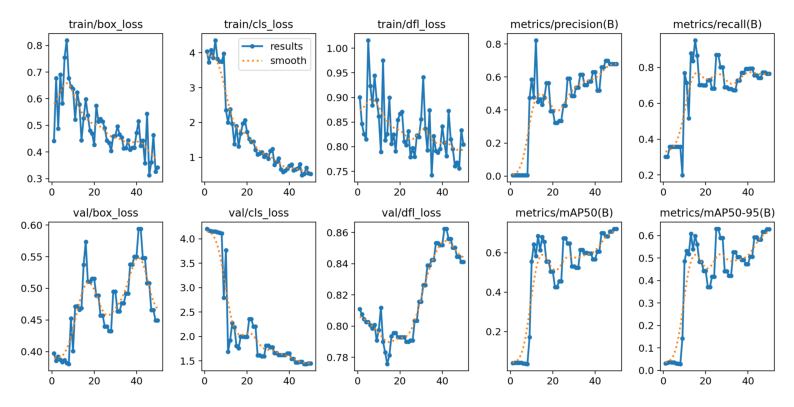

In [ ]:
import matplotlib.pyplot as plt
import cv2 # Import cv2 to read the image

# Read the image from the file path
image_path = '/content/runs/detect/train2/results.png'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off') # Hide axes for a cleaner image display
    plt.show()
else:
    print(f"Error: Could not read image from {image_path}")

test:

In [ ]:
model = YOLO("/content/yolo11l_50epochs.pt")
results = model.val(data='/content/triangles_full_images/triangles_full_images_yaml.yaml',split='test')

precision = results.box.p  # Precision
recall = results.box.r    # Recall

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1266.0±91.2 MB/s, size: 201.9 KB)


val: Scanning /content/triangles_full_images/test/labels... 1 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<00:00, 1184.83it/s]

val: New cache created: /content/triangles_full_images/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


                   all          2        105      0.494      0.714      0.574      0.493
                circle          1         11      0.354      0.909      0.671      0.575
              triangle          1         83      0.916      0.687       0.83      0.707
             truncated          1         11      0.211      0.545       0.22      0.199
Speed: 6.8ms preprocess, 1882.8ms inference, 0.0ms loss, 17.9ms postprocess per image
Results saved to runs/detect/val5
Precision: [    0.35415     0.91632     0.21114]
Recall: [    0.90909     0.68675     0.54545]


validation:

In [ ]:
model = YOLO("/content/yolo11l_50epochs.pt")
results = model.val(data='/content/triangles_full_images/triangles_full_images_yaml.yaml',split='val')

precision = results.box.p  # Precision
recall = results.box.r    # Recall

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 972.3±472.4 MB/s, size: 741.8 KB)


val: Scanning /content/triangles_full_images/valid/labels.cache... 2 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.36s/it]


                   all          4         19      0.679      0.766      0.722       0.63
                circle          1          7          1      0.814      0.869      0.682
              triangle          2          6       0.59      0.483      0.586      0.582
             truncated          2          6      0.448          1       0.71      0.624
Speed: 3.0ms preprocess, 2540.9ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/val6
Precision: [          1     0.58988     0.44807]
Recall: [    0.81422     0.48314           1]


In [ ]:
IPyImage(filename='/content/runs/detect/predict/triangles_test.jpg', width=600)

visualizing predictions on test and valid:


image 1/1 /content/triangles_full_images/valid/images/triangles_valid1.jpg: 640x640 2 triangles, 6 truncateds, 47.4ms
Speed: 4.2ms preprocess, 47.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


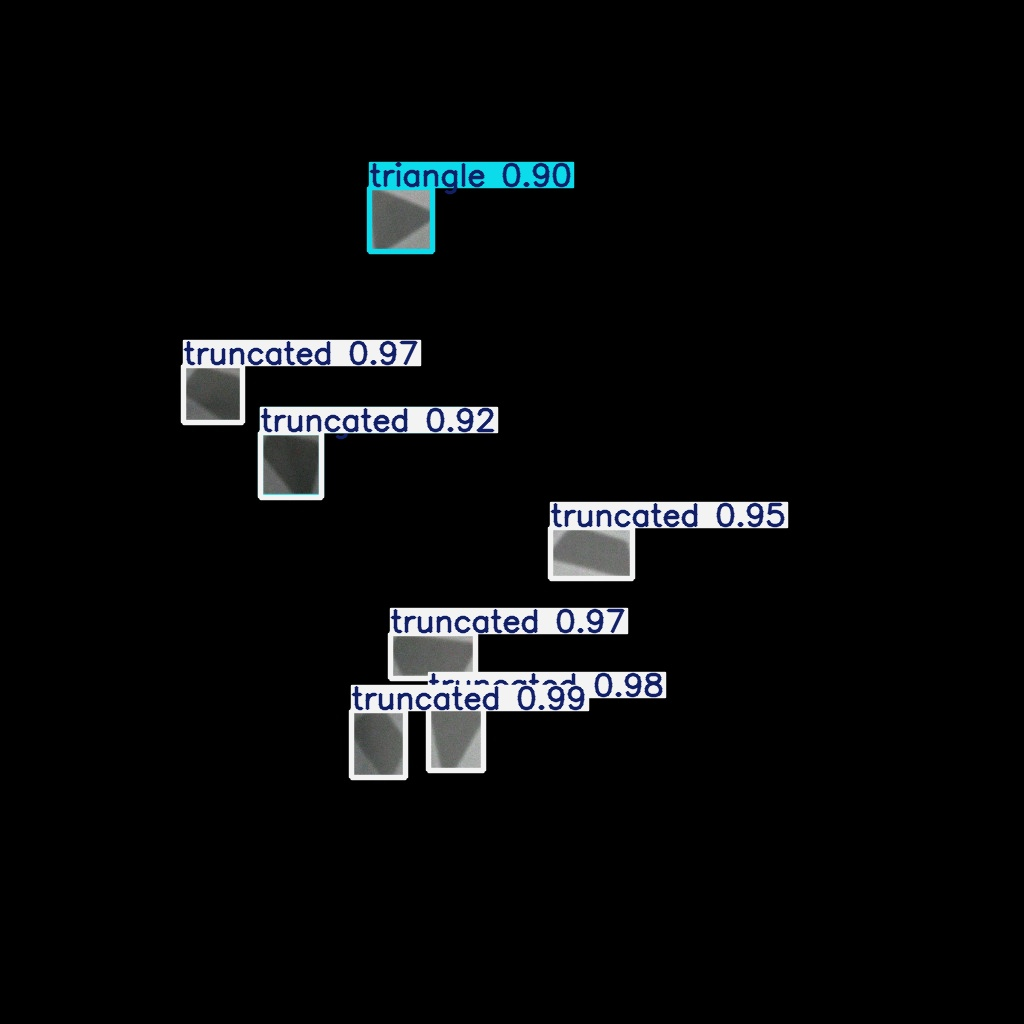

In [ ]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")

val_image_path = "/content/triangles_full_images/valid/images/triangles_valid1.jpg" # valid1
results = model.predict(source=val_image_path, save=True)

predict_dir = sorted([d for d in os.listdir("/content/runs/detect") if d.startswith("predict")])[-1]
predict_image_path = f"/content/runs/detect/{predict_dir}/" + os.path.basename(val_image_path)

# Show the annotated validation image
IPyImage(filename=predict_image_path, width=600)



image 1/1 /content/triangles_full_images/valid/images/triangles_valid2.jpg: 448x640 5 circles, 2 triangles, 6 truncateds, 56.9ms
Speed: 2.7ms preprocess, 56.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3


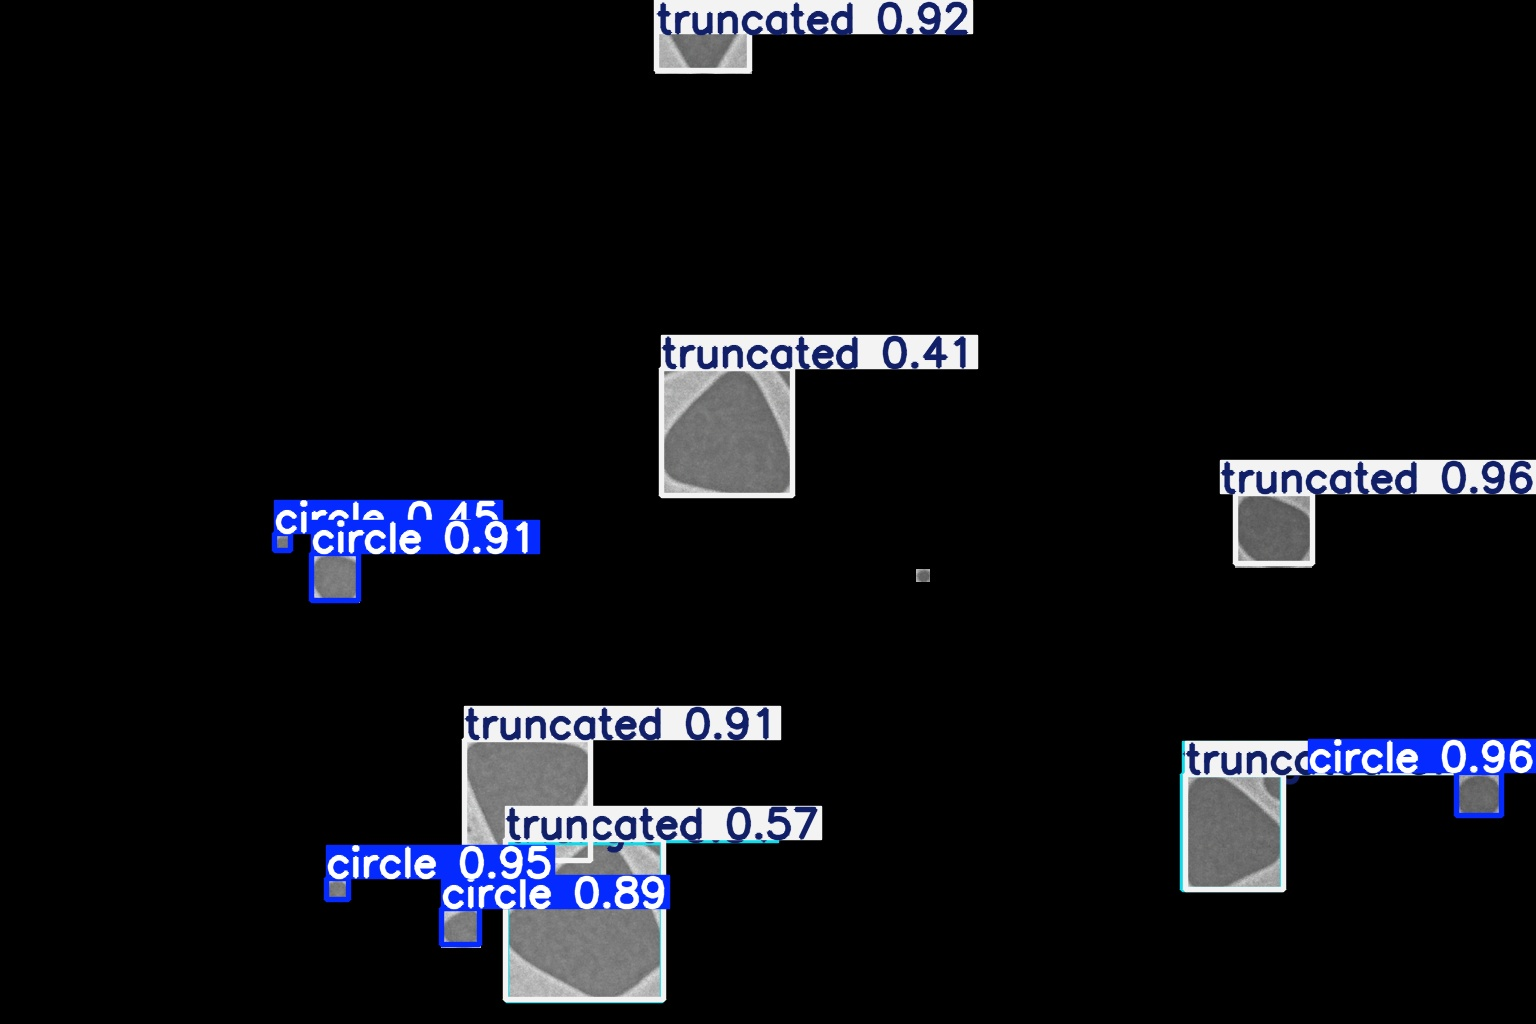

In [ ]:
from ultralytics import YOLO
from IPython.display import Image as IPyImage
import os

model = YOLO("/content/runs/detect/train2/weights/best.pt")

val_image_path = "/content/triangles_full_images/valid/images/triangles_valid2.jpg" # valid2
results = model.predict(source=val_image_path, save=True)

predict_dir = sorted([d for d in os.listdir("/content/runs/detect") if d.startswith("predict")])[-1]
predict_image_path = f"/content/runs/detect/{predict_dir}/" + os.path.basename(val_image_path)

# Show the annotated validation image
IPyImage(filename=predict_image_path, width=600)


image 1/1 /content/triangles_full_images/test/masked_images/triangles_test.jpg: 608x640 23 circles, 59 triangles, 21 truncateds, 47.4ms
Speed: 4.2ms preprocess, 47.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict5


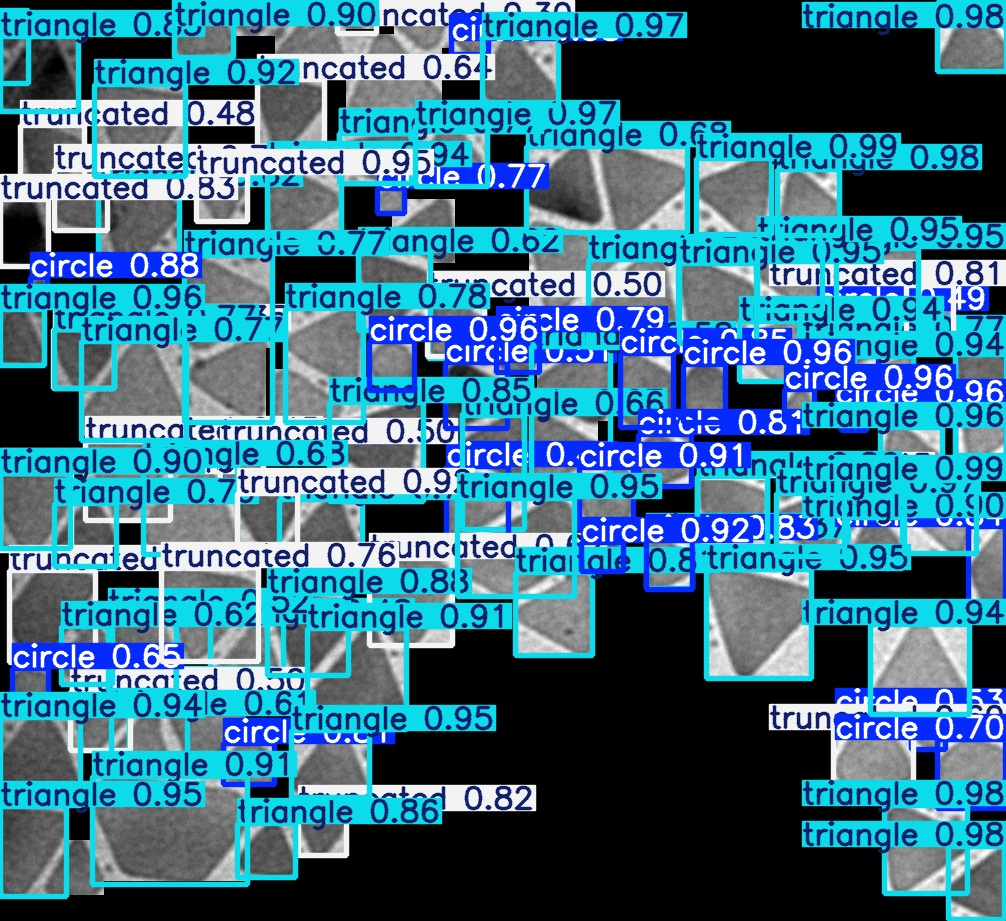

In [ ]:
from ultralytics import YOLO
from IPython.display import Image as IPyImage
import os

model = YOLO("/content/runs/detect/train2/weights/best.pt")

val_image_path = "/content/triangles_full_images/test/masked_images/triangles_test.jpg" # test image
results = model.predict(source=val_image_path, save=True)

predict_dir = sorted([d for d in os.listdir("/content/runs/detect") if d.startswith("predict")])[-1]
predict_image_path = f"/content/runs/detect/{predict_dir}/" + os.path.basename(val_image_path)

# Show the annotated validation image
IPyImage(filename=predict_image_path, width=600)